## Taller #11: Análisis de sentimiento

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

- librerias

In [106]:
import pandas as pd

#from sentiment_analysis_spanish import sentiment_analysis
from flair.models import TextClassifier
from flair.data import Sentence
from googletrans import Translator

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
 
from nltk.corpus import stopwords

stopwords = stopwords.words('spanish')

import PIL.Image
from IPython.display import display

In [4]:
# carga de archivo

data = pd.read_csv('data_twitter_viernes13.csv')
data.head()

,id,fecha_pub,usuario,tweet,user_location,link,tweet_clean,links,hashtags,mentions,emojis,pre_procesado,Date
0,1326928429091065859,2020-11-12 16:42:45,VTVcanal8,"#EnVideo📹| Desde este viernes 13 de noviembre,...",Venezuela,https://twitter.com/i/web/status/1326928429091...,"Desde este viernes 13 de noviembre, inicia d...",['https://t.co/xOEZfR4e0k'],"['#EnVideo📹|', '#LeerDesbloquea']",['@ve_cne'],[],noviembre inicia despliegue maquinas votacion ...,2020-11-12
1,1326848774510170114,2020-11-12 11:26:14,KiddKeo95Flames,"y mañana es viernes 13 hay q hacer algo, Llama...",ROCKPORT,https://twitter.com/i/web/status/1326848774510...,"y mañana es viernes 13 hay q hacer algo, Llama...",[],[],[],[],q hacer llama jason vamonos d party,2020-11-12
2,1326928773682524160,2020-11-12 16:44:07,QuinteroCalle,"Con el Gobierno Nacional, los alcaldes del @Ar...","Medellín, Colombia",https://twitter.com/i/web/status/1326928773682...,"Con el Gobierno Nacional, los alcaldes del y ...",[],[],"['@Areametropol', '@anibalgaviria']",[],gobierno nacional alcaldes gobernador decidimo...,2020-11-12
3,1327096677384204291,2020-11-13 03:51:18,DiegoUsui,¿Alguien para dedicarle Viernes 13?\n\nUrge pa...,"Pachuca de Soto, Hidalgo",https://twitter.com/i/web/status/1327096677384...,¿Alguien para dedicarle Viernes 13?\n\nUrge pa...,[],[],[],['🥴'],alguien dedicarle urge,2020-11-13
4,1327096674829934592,2020-11-13 03:51:18,axterix1366,El Gran Maestro jacques de MOLAY Gran Maestre ...,Mex D F,https://twitter.com/i/web/status/1327096674829...,El Gran Maestro jacques de MOLAY Gran Maestre ...,['https://t.co/VFTvEtC7dm'],[],[],[],gran maestro jacques molay gran maestre pauper...,2020-11-13


Para hallar el puntaje del sentimiento, primero se va a traducir el texto al idioma ingles y luego se va usar la libreria $\textit{Vader}$

In [5]:
translator = Translator()

In [17]:
data['tweet_clean_ingles'] = data['tweet_clean'].apply(lambda valor: translator.translate(valor, src='es', dest='en').text)
data.head()

,id,fecha_pub,usuario,tweet,user_location,link,tweet_clean,links,hashtags,mentions,emojis,pre_procesado,Date,tweet_clean_ingles
0,1326928429091065859,2020-11-12 16:42:45,VTVcanal8,"#EnVideo📹| Desde este viernes 13 de noviembre,...",Venezuela,https://twitter.com/i/web/status/1326928429091...,"Desde este viernes 13 de noviembre, inicia d...",['https://t.co/xOEZfR4e0k'],"['#EnVideo📹|', '#LeerDesbloquea']",['@ve_cne'],[],noviembre inicia despliegue maquinas votacion ...,2020-11-12,"From this Friday, November 13, the deployment ..."
1,1326848774510170114,2020-11-12 11:26:14,KiddKeo95Flames,"y mañana es viernes 13 hay q hacer algo, Llama...",ROCKPORT,https://twitter.com/i/web/status/1326848774510...,"y mañana es viernes 13 hay q hacer algo, Llama...",[],[],[],[],q hacer llama jason vamonos d party,2020-11-12,And tomorrow is Friday the 13th we have to do ...
2,1326928773682524160,2020-11-12 16:44:07,QuinteroCalle,"Con el Gobierno Nacional, los alcaldes del @Ar...","Medellín, Colombia",https://twitter.com/i/web/status/1326928773682...,"Con el Gobierno Nacional, los alcaldes del y ...",[],[],"['@Areametropol', '@anibalgaviria']",[],gobierno nacional alcaldes gobernador decidimo...,2020-11-12,"With the National Government, the mayors and t..."
3,1327096677384204291,2020-11-13 03:51:18,DiegoUsui,¿Alguien para dedicarle Viernes 13?\n\nUrge pa...,"Pachuca de Soto, Hidalgo",https://twitter.com/i/web/status/1327096677384...,¿Alguien para dedicarle Viernes 13?\n\nUrge pa...,[],[],[],['🥴'],alguien dedicarle urge,2020-11-13,Anyone to dedicate Friday the 13th?\n\nUrge fo...
4,1327096674829934592,2020-11-13 03:51:18,axterix1366,El Gran Maestro jacques de MOLAY Gran Maestre ...,Mex D F,https://twitter.com/i/web/status/1327096674829...,El Gran Maestro jacques de MOLAY Gran Maestre ...,['https://t.co/VFTvEtC7dm'],[],[],[],gran maestro jacques molay gran maestre pauper...,2020-11-13,The Grand Master Jacques de MOLAY Grand Master...


In [45]:
vader = SentimentIntensityAnalyzer()

In [48]:
data['sentimiento'] = data['tweet_clean_ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data.head()

,id,fecha_pub,usuario,tweet,user_location,link,tweet_clean,links,hashtags,mentions,emojis,pre_procesado,Date,tweet_clean_ingles,sentimiento
0,1326928429091065859,2020-11-12 16:42:45,VTVcanal8,"#EnVideo📹| Desde este viernes 13 de noviembre,...",Venezuela,https://twitter.com/i/web/status/1326928429091...,"Desde este viernes 13 de noviembre, inicia d...",['https://t.co/xOEZfR4e0k'],"['#EnVideo📹|', '#LeerDesbloquea']",['@ve_cne'],[],noviembre inicia despliegue maquinas votacion ...,2020-11-12,"From this Friday, November 13, the deployment ...",0.0000
1,1326848774510170114,2020-11-12 11:26:14,KiddKeo95Flames,"y mañana es viernes 13 hay q hacer algo, Llama...",ROCKPORT,https://twitter.com/i/web/status/1326848774510...,"y mañana es viernes 13 hay q hacer algo, Llama...",[],[],[],[],q hacer llama jason vamonos d party,2020-11-12,And tomorrow is Friday the 13th we have to do ...,0.4019
2,1326928773682524160,2020-11-12 16:44:07,QuinteroCalle,"Con el Gobierno Nacional, los alcaldes del @Ar...","Medellín, Colombia",https://twitter.com/i/web/status/1326928773682...,"Con el Gobierno Nacional, los alcaldes del y ...",[],[],"['@Areametropol', '@anibalgaviria']",[],gobierno nacional alcaldes gobernador decidimo...,2020-11-12,"With the National Government, the mayors and t...",0.0000
3,1327096677384204291,2020-11-13 03:51:18,DiegoUsui,¿Alguien para dedicarle Viernes 13?\n\nUrge pa...,"Pachuca de Soto, Hidalgo",https://twitter.com/i/web/status/1327096677384...,¿Alguien para dedicarle Viernes 13?\n\nUrge pa...,[],[],[],['🥴'],alguien dedicarle urge,2020-11-13,Anyone to dedicate Friday the 13th?\n\nUrge fo...,0.0000
4,1327096674829934592,2020-11-13 03:51:18,axterix1366,El Gran Maestro jacques de MOLAY Gran Maestre ...,Mex D F,https://twitter.com/i/web/status/1327096674829...,El Gran Maestro jacques de MOLAY Gran Maestre ...,['https://t.co/VFTvEtC7dm'],[],[],[],gran maestro jacques molay gran maestre pauper...,2020-11-13,The Grand Master Jacques de MOLAY Grand Master...,-0.6917


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

In [54]:
data[['tweet_clean', 'sentimiento']].sort_values('sentimiento', ascending=False)

,tweet_clean,sentimiento
121,hoy no trabajo pero tampoco puedo dormir... E...,0.9620
172,"Viernes 13, felices 11 meses mi amor !!!!! En ...",0.9611
103,Sonrisas o sorpresas literarias... Gracias y ...,0.9590
32,VAMOSSSSSSSSSSSS\njason nene FELIZ VIERNES 13 ...,0.9452
115,Qué tú pones buena suerte en mi viernes 13... ✨😊,0.9217
...,...,...
78,Me chupa un huevo el viernes 13 pero tengo el ...,-0.7269
125,Viernes 13 brrr los demonio los diablo los lobo,-0.8126
170,Apagón Axtel :( es el castigo de viernes 13 en...,-0.8126
162,"YA ENTENDÍ Q ESTÁ PASANDO, ES EL VIERNES 13, ...",-0.9081


In [56]:
# tweet mas negativo

data.loc[71]['tweet_clean']

'Cómo me doles noviembre, como me doles, maldito viernes 13 hijo de re mil puta jajajajaj'

In [58]:
# tweet mas positivo

data.loc[121]['tweet_clean']

' hoy no trabajo pero tampoco puedo dormir... Este no el camino 🤣\nQue tengáis un buen viernes 13... Café? 💋💛 '

###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [64]:
def label_sentiment(n):
    if n < -0.33:
        return 'negativo'
    elif n < 0.33:
        return 'neutro'
    else:
        return 'positivo'

In [73]:
data['label_sentimiento'] = data['sentimiento'].apply(lambda numero: label_sentiment(numero))
data.head()

,id,fecha_pub,usuario,tweet,user_location,link,tweet_clean,links,hashtags,mentions,emojis,pre_procesado,Date,tweet_clean_ingles,sentimiento,label_sentimiento
0,1326928429091065859,2020-11-12 16:42:45,VTVcanal8,"#EnVideo📹| Desde este viernes 13 de noviembre,...",Venezuela,https://twitter.com/i/web/status/1326928429091...,"Desde este viernes 13 de noviembre, inicia d...",['https://t.co/xOEZfR4e0k'],"['#EnVideo📹|', '#LeerDesbloquea']",['@ve_cne'],[],noviembre inicia despliegue maquinas votacion ...,2020-11-12,"From this Friday, November 13, the deployment ...",0.0000,neutro
1,1326848774510170114,2020-11-12 11:26:14,KiddKeo95Flames,"y mañana es viernes 13 hay q hacer algo, Llama...",ROCKPORT,https://twitter.com/i/web/status/1326848774510...,"y mañana es viernes 13 hay q hacer algo, Llama...",[],[],[],[],q hacer llama jason vamonos d party,2020-11-12,And tomorrow is Friday the 13th we have to do ...,0.4019,positivo
2,1326928773682524160,2020-11-12 16:44:07,QuinteroCalle,"Con el Gobierno Nacional, los alcaldes del @Ar...","Medellín, Colombia",https://twitter.com/i/web/status/1326928773682...,"Con el Gobierno Nacional, los alcaldes del y ...",[],[],"['@Areametropol', '@anibalgaviria']",[],gobierno nacional alcaldes gobernador decidimo...,2020-11-12,"With the National Government, the mayors and t...",0.0000,neutro
3,1327096677384204291,2020-11-13 03:51:18,DiegoUsui,¿Alguien para dedicarle Viernes 13?\n\nUrge pa...,"Pachuca de Soto, Hidalgo",https://twitter.com/i/web/status/1327096677384...,¿Alguien para dedicarle Viernes 13?\n\nUrge pa...,[],[],[],['🥴'],alguien dedicarle urge,2020-11-13,Anyone to dedicate Friday the 13th?\n\nUrge fo...,0.0000,neutro
4,1327096674829934592,2020-11-13 03:51:18,axterix1366,El Gran Maestro jacques de MOLAY Gran Maestre ...,Mex D F,https://twitter.com/i/web/status/1327096674829...,El Gran Maestro jacques de MOLAY Gran Maestre ...,['https://t.co/VFTvEtC7dm'],[],[],[],gran maestro jacques molay gran maestre pauper...,2020-11-13,The Grand Master Jacques de MOLAY Grand Master...,-0.6917,negativo


In [79]:
data.label_sentimiento.value_counts(normalize=False, ascending=False)

neutro      105
positivo     58
negativo     37
Name: label_sentimiento, dtype: int64

In [80]:
data.label_sentimiento.value_counts(normalize=True, ascending=False)

neutro      0.525
positivo    0.290
negativo    0.185
Name: label_sentimiento, dtype: float64

###  `[BONUS 5pts]` : Diagrama de barras de la pregunta 3

In [99]:
df = pd.DataFrame(data.label_sentimiento.value_counts(normalize=False, ascending=False)).reset_index()
df.columns = ['sentimiento','cont']
df

,sentimiento,cont
0,neutro,105
1,positivo,58
2,negativo,37


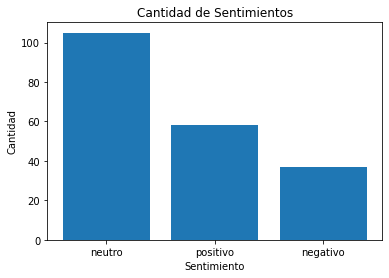

In [104]:
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad')
ax.set_xlabel('Sentimiento')
ax.set_title('Cantidad de Sentimientos')
plt.bar(df['sentimiento'].values, df['cont'].values)
plt.show()

###  `[BONUS 7pts]` : Nubes de palabras por sentimiento

In [173]:
pos = PIL.Image.open("positivo.jpg")
neg = PIL.Image.open("negativo.jpg")
neu = PIL.Image.open("neutro.jpg")

In [174]:
mask_pos = np.array(pos)
mask_neg = np.array(neg)
mask_neu = np.array(neu)

In [170]:
palabras_pos = data[data['label_sentimiento']=='positivo']['pre_procesado'].str.cat(sep=' ')
palabras_neg = data[data['label_sentimiento']=='negativo']['pre_procesado'].str.cat(sep=' ')
palabras_neu = data[data['label_sentimiento']=='neutro']['pre_procesado'].str.cat(sep=' ')

In [171]:
def nube(mask, palabras):
    wordcloud = WordCloud(width=600, height=400,
                      max_font_size=150, max_words=250,
                      background_color='white', colormap='Wistia',
                      stopwords=None, random_state=13,
                      mask=mask, contour_width=0.2, contour_color='black').generate(palabras)

    #wordcloud.to_file("calabaza.png")

    plt.figure(figsize=(10,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

### Positivo

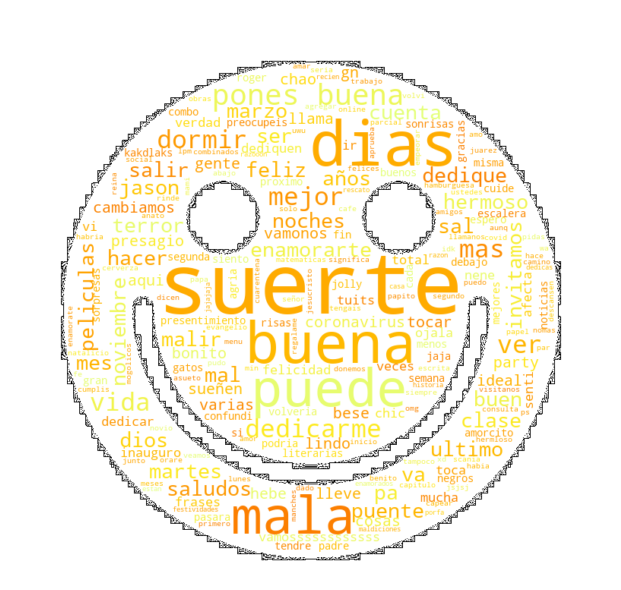

In [175]:
nube(mask_pos, palabras_pos)

### Negativo

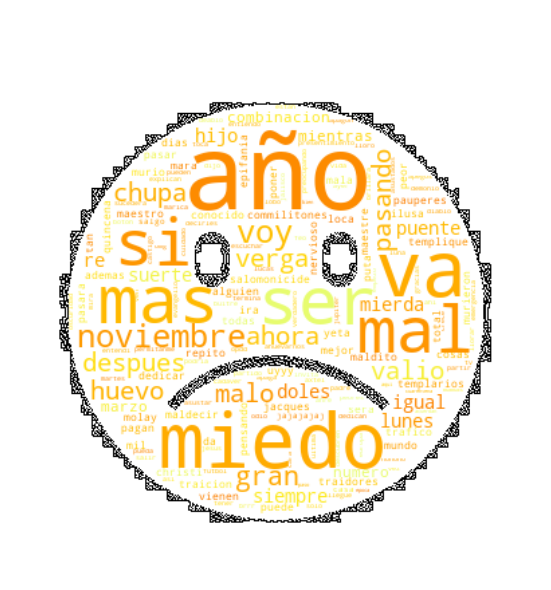

In [176]:
nube(mask_neg, palabras_neg)

### Neutro

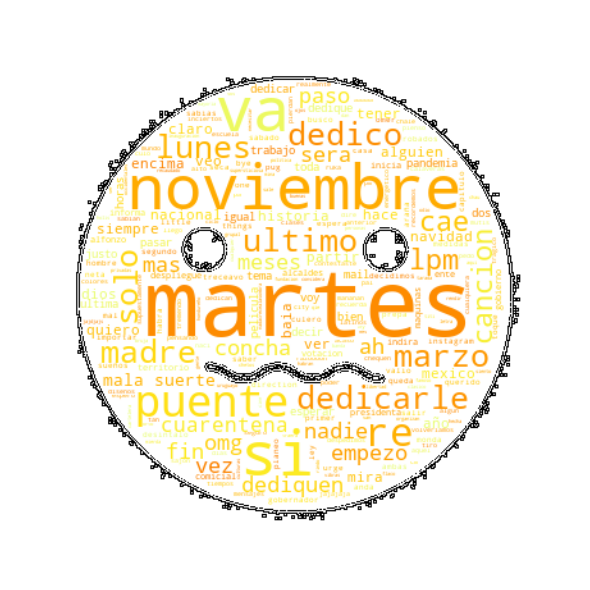

In [177]:
nube(mask_neu, palabras_neu)